# Network #3.1


## Network Input:  

YEAR,
MONTH,
DAY,
HOUR,
MINUTE,
Latitude,
Longitude,
Distance to Graffiti,
Distance to a Drinking Fountain

## Outputs:

Probability of crime occuring

#### Loading data and creating dataset to be used

##### Importing dataset, creating Date/Time key & adding crime

In [1]:
import pandas as pd
import numpy as np

# File loaded from Github Repo
file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/final_crime.csv'

df = pd.read_csv(file_path)

# Removing invalid points
df = df[pd.isnull(df['NEIGHBOURHOOD']) != pd.isnull(pd.NaT)]

df = df[['YEAR','MONTH','DAY','HOUR', 'MINUTE', 'Neighbourhood', 'Latitude', 'Longitude', 'Graffiti', 'Drinking_Fountain']] 
print("Shape of Dataset imported for use: " + str(df.shape) + "\n")

print("Sample row")
df.head(1)

Shape of Dataset imported for use: (428141, 10)

Sample row


,YEAR,MONTH,DAY,HOUR,MINUTE,Neighbourhood,Latitude,Longitude,Graffiti,Drinking_Fountain
0,2004,10,8,21.0,0.0,Fairview,49.265076,-123.118474,0.040765,0.402295


In [2]:
# Creating a Key which will be a Date/Time object

print ("------ Adding date-time object as key ------\n")
date_time_col = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY', 'HOUR','MINUTE']])

# Make the added Date the index of the dataset
df['DateTimeMix'] = date_time_col
df.set_index('DateTimeMix', inplace=True)

print("Sample row")
df.head(1)

------ Adding date-time object as key ------

Sample row


,YEAR,MONTH,DAY,HOUR,MINUTE,Neighbourhood,Latitude,Longitude,Graffiti,Drinking_Fountain
DateTimeMix,,,,,,,,,,
2004-10-08 21:00:00,2004,10,8,21.0,0.0,Fairview,49.265076,-123.118474,0.040765,0.402295


In [3]:
df['Crime'] = 1
print("Sample row")
df.head(1)

Sample row


,YEAR,MONTH,DAY,HOUR,MINUTE,Neighbourhood,Latitude,Longitude,Graffiti,Drinking_Fountain,Crime
DateTimeMix,,,,,,,,,,,
2004-10-08 21:00:00,2004,10,8,21.0,0.0,Fairview,49.265076,-123.118474,0.040765,0.402295,1


##### Import Neighbourhoods and Function to generate co-ordinates in neighbourhood

In [4]:
# Import a list of all neighbourhoods and their center co-ordinates in Vancouver

nb_file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/cov_localareas.csv'

neighbourhoods = pd.read_csv(nb_file_path)
print("List of Neighbourhoods : ")
neighbourhoods

List of Neighbourhoods : 


,MAPID,NAME,Latitude,Longitude
0,SUN,Sunset,49.218650,-123.091376
1,MP,Mount Pleasant,49.263060,-123.099888
2,RP,Riley Park,49.244679,-123.103239
3,CBD,Downtown,49.279255,-123.119137
4,KITS,Kitsilano,49.265663,-123.166947
5,DS,Dunbar-Southlands,49.242361,-123.185280
6,KERR,Kerrisdale,49.225466,-123.157878
7,AR,Arbutus-Ridge,49.245938,-123.160737
8,WPG,West Point Grey,49.265928,-123.202077
9,MARP,Marpole,49.210702,-123.130159


In [5]:
# Given a neighbourhood and a radius this code generates a random point in it and returns co-ordinates

import random
import math

def RandomLatLong(nieghbourhood, radius):
  
  r = radius/111300            
  
  row = neighbourhoods[neighbourhoods['NAME'] == nieghbourhood]

  x0 = float(row['Latitude'])
  y0 = float(row['Longitude'])
  
  u = float(random.uniform(0.0,1.0))
  v = float(random.uniform(0.0,1.0))

  w = r * math.sqrt(u)
  t = 2 * math.pi * v
  x = w * math.cos(t) 
  y = w * math.sin(t)

  xLat  = x + x0
  yLong = y + y0

  return (xLat, yLong)

RandomLatLong('Fairview', 500)

(49.265266062912325, -123.13053701698634)

##### Import Graffiti and Function to get distance from Graffiti

In [6]:
# Import a list of all graffiti locations

gr_file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/Graffiti.csv'

graffiti = pd.read_csv(gr_file_path)
print("Number of graffiti instances: " + str(graffiti.shape))
print("Sample row")
graffiti.head(1)

Number of graffiti instances: (8507, 2)
Sample row


,Latitude,Longitude
0,49.22386,-123.090426


In [7]:
# Convert all coordinates to radians for easier calculations later
graffiti = graffiti.apply(np.radians)
print("Sample row")
print(graffiti.head(1))
graffiti = graffiti.values

Sample row
   Latitude  Longitude
0  0.859118  -2.148333


In [8]:
def DistanceToGraffiti(lat1, lon1):
    r = 6371 # Radius of earth in kilometers
    
    coordinates = np.array([np.radians(lat1), np.radians(lon1)])
    diff_array = graffiti - coordinates
    
    # Applying the haversine formula as array functions for speed
    a = np.square(np.sin(diff_array[:, 0]/2.0)) + np.cos(coordinates[0]) * np.cos(graffiti[:, 0]) * np.square(np.sin(diff_array[:, 1]/2.0))
    c = 2 * np.arcsin(np.sqrt(a)) 
    return np.amin(c)*r

DistanceToGraffiti(49.2650765,-123.1184743)

0.04076535081267878

##### Import Drinking fountain and Function to get distance from Drinking fountain

In [9]:
# Import a list of all drinking fountain locations

df_file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/drinking_fountains.csv'

drinking = pd.read_csv(df_file_path)
drinking = drinking[['LATITUDE', 'LONGITUDE']]
print("Number of drinking fountains: " + str(drinking.shape))
print("Sample row")
drinking.head(1)

Number of drinking fountains: (240, 2)
Sample row


,LATITUDE,LONGITUDE
0,49.234947,-123.027254


In [10]:
# Convert all coordinates to radians for easier calculations later
drinking = drinking.apply(np.radians)
print("Sample row")
print(drinking.head(1))
drinking = drinking.values

Sample row
   LATITUDE  LONGITUDE
0  0.859312  -2.147231


In [11]:
def DistanceToFountain(lat1, lon1):
    r = 6371 # Radius of earth in kilometers
    
    coordinates = np.array([np.radians(lat1), np.radians(lon1)])
    diff_array = drinking - coordinates
    
    # Applying the haversine formula as array functions for speed
    a = np.square(np.sin(diff_array[:, 0]/2.0)) + np.cos(coordinates[0]) * np.cos(drinking[:, 0]) * np.square(np.sin(diff_array[:, 1]/2.0))
    c = 2 * np.arcsin(np.sqrt(a)) 
    return np.amin(c)*r

DistanceToFountain(49.2650765,-123.1184743)

0.40229507588315133

#### Upsample every 30 minute and add data points

In [0]:
import random

df_extra = df.groupby(level=0).count().resample('30min').asfreq()
df_extra = df_extra[pd.isna((df_extra['HOUR']))]

df_extra['Crime'] = 0
df_extra['YEAR'] = df_extra.index.year
df_extra['MONTH'] = df_extra.index.month
df_extra['DAY'] = df_extra.index.day
df_extra['HOUR'] = df_extra.index.hour
df_extra['MINUTE'] = df_extra.index.minute
df_extra['Neighbourhood'] = [neighbourhoods.sample()['NAME'].values[0] for i in range(0,df_extra.values.shape[0])]
df_extra[['Latitude', 'Longitude']] = df_extra['Neighbourhood'].apply(lambda x: RandomLatLong(x, 500)).apply(pd.Series)
df_extra['Graffiti'] = df_extra.apply(lambda x: DistanceToGraffiti(x['Latitude'], x['Longitude']), axis=1)
df_extra['Drinking_Fountain'] = df_extra.apply(lambda x: DistanceToFountain(x['Latitude'], x['Longitude']), axis=1)

In [48]:
df_extra.head(4)

,YEAR,MONTH,DAY,HOUR,MINUTE,Neighbourhood,Latitude,Longitude,Graffiti,Drinking_Fountain,Crime
DateTimeMix,,,,,,,,,,,
2004-01-01 00:30:00,2004,1,1,0,30,West End,49.287706,-123.137753,0.026087,0.140098,0
2004-01-01 01:30:00,2004,1,1,1,30,Grandview-Woodland,49.276328,-123.067670,0.062283,0.328798,0
2004-01-01 02:00:00,2004,1,1,2,0,Kerrisdale,49.225972,-123.156607,0.072732,0.383322,0
2004-01-01 02:30:00,2004,1,1,2,30,Renfrew-Collingwood,49.246673,-123.038134,0.178193,0.669119,0


In [50]:
print("Shape of Original Dataset: " + str(df.shape) + "\n")

df = df.append(df_extra)

print("Shape of Upsampled Dataset with No crime values: " + str(df.shape) + "\n")

Shape of Original Dataset: (428141, 11)

Shape of Upsampled Dataset with No crime values: (542276, 11)



#### Extract network input and output and make sets

In [0]:
Y = df['Crime'].values
X = df[['YEAR','MONTH','DAY','HOUR', 'MINUTE', 'Latitude', 'Longitude', 'Graffiti', 'Drinking_Fountain']].values

In [109]:
X[0]

array([ 2.00400000e+03,  1.00000000e+01,  8.00000000e+00,  2.10000000e+01,
        0.00000000e+00,  4.92650765e+01, -1.23118474e+02,  4.07653508e-02,
        4.02295076e-01])

In [110]:
Y[0]

1

In [111]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)
X = scaler.transform(X)
print(X[0])

[0.         0.81818182 0.23333333 0.91304348 0.         0.57072995
 0.52565412 0.01767776 0.17955004]


In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

print("Training Data Size: " + str(X_train.shape))
print("Testing Data Size:" + str(X_test.shape))
print("Training Label Size: " + str(Y_train.shape))
print("Testing Label Size: " + str(Y_test.shape))

Training Data Size: (363324, 9)
Testing Data Size:(178952, 9)
Training Label Size: (363324,)
Testing Label Size: (178952,)


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot loss and accuracy vs epochs
def loss_curve(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  x_axis     = range(1, len(history.history['loss'])+1)
  
  plt.figure()
  plt.plot(x_axis, train_loss, label="Training Loss")
  plt.plot(x_axis, val_loss, label="Validation Loss")
  plt.ylabel('Loss Value')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Loss')
  plt.legend()
  
def accuracy(history):
  acc  = history.history['acc']
  val_acc = history.history['val_acc']
  x_axis     = range(1, len(history.history['acc'])+1)
  
  plt.figure()
  plt.plot(x_axis, np.dot(acc,100), label="Accuracy")
  plt.plot(x_axis, np.dot(val_acc, 100), label="Validation Accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Accuracy')
  plt.legend()

#### Training Network

In [121]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(64, activation='sigmoid', input_shape=(X_train.shape[1], ) ) )
model.add(Dense(128, activation='sigmoid') )
model.add(Dense(512, activation='sigmoid') )
model.add(Dense(128, activation='sigmoid') )
model.add(Dense(64, activation='sigmoid') )


model.add(Dense(1, activation='sigmoid') )

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_83 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_84 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_85 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_86 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 65        
Total params: 148,993
Trainable params: 148,993
Non-trainable params: 0
_________________________________________________________________


In [122]:
history = model.fit(X_train, Y_train,
          epochs = 50,
          batch_size=128,
          validation_split=0.1,
          verbose = 1)

Train on 326991 samples, validate on 36333 samples
Epoch 1/50
326991/326991 [==============================] - 10s 32us/step - loss: 0.4630 - acc: 0.7911 - val_loss: 0.4429 - val_acc: 0.7932
Epoch 2/50
326991/326991 [==============================] - 9s 29us/step - loss: 0.4443 - acc: 0.7949 - val_loss: 0.4390 - val_acc: 0.7945
Epoch 3/50
326991/326991 [==============================] - 11s 34us/step - loss: 0.4431 - acc: 0.7956 - val_loss: 0.4391 - val_acc: 0.7978
Epoch 4/50
326991/326991 [==============================] - 9s 29us/step - loss: 0.4425 - acc: 0.7954 - val_loss: 0.4385 - val_acc: 0.7936
Epoch 5/50
326991/326991 [==============================] - 9s 29us/step - loss: 0.4408 - acc: 0.7961 - val_loss: 0.4340 - val_acc: 0.7983
Epoch 6/50
326991/326991 [==============================] - 9s 29us/step - loss: 0.4147 - acc: 0.8075 - val_loss: 0.3550 - val_acc: 0.8378
Epoch 7/50
326991/326991 [==============================] - 9s 29us/step - loss: 0.3378 - acc: 0.8392 - val_loss:

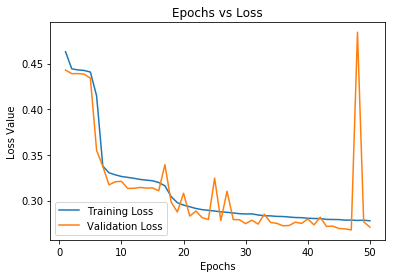

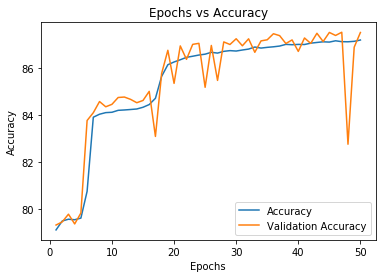

In [123]:
loss_curve(history)
accuracy(history)

In [124]:
print("Evaluating on Test Dataset")
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Evaluating on Test Dataset
acc: 87.23%


In [125]:
# Predicting for random year/month/day/hour

test = np.array([[2019, 2, 11, 1,25, 49.237994, -123.083282, DistanceToGraffiti(49.237994, -123.083282), DistanceToFountain(49.237994, -123.083282)]])
test = scaler.transform(test)
ans = model.predict(test)
ans

array([[0.9991744]], dtype=float32)

In [126]:
# Predicting for another random year/month/day/hour

test = np.array([[2012, 6, 4, 22, 2, 49.238019, -123.163815, DistanceToGraffiti(49.238019, -123.163815), DistanceToFountain(49.238019, -123.163815)]])
test = scaler.transform(test)
ans = model.predict(test)
ans

array([[0.9269677]], dtype=float32)

In [127]:
# Predict crime in a location over the whole day
for i in range(0, 25):
  test = np.array([[2012, 6, 4, i, 2, 49.284645, -123.136306, DistanceToGraffiti(49.284645, -123.136306), DistanceToFountain(49.284645, -123.136306)]])
  test = scaler.transform(test)
  ans = model.predict(test)
  print("Likelihood of crime at " + str(i) + " hour: " + str(ans[0][0]*100) + " %") 

Likelihood of crime at 0 hour: 99.45923686027527 %
Likelihood of crime at 1 hour: 96.25698924064636 %
Likelihood of crime at 2 hour: 93.15892457962036 %
Likelihood of crime at 3 hour: 90.88289141654968 %
Likelihood of crime at 4 hour: 91.7508602142334 %
Likelihood of crime at 5 hour: 94.60505247116089 %
Likelihood of crime at 6 hour: 95.14633417129517 %
Likelihood of crime at 7 hour: 95.47150135040283 %
Likelihood of crime at 8 hour: 95.8312451839447 %
Likelihood of crime at 9 hour: 96.16899490356445 %
Likelihood of crime at 10 hour: 96.46843671798706 %
Likelihood of crime at 11 hour: 96.74128293991089 %
Likelihood of crime at 12 hour: 97.00418710708618 %
Likelihood of crime at 13 hour: 97.27053642272949 %
Likelihood of crime at 14 hour: 97.54887223243713 %
Likelihood of crime at 15 hour: 97.8429913520813 %
Likelihood of crime at 16 hour: 98.15164804458618 %
Likelihood of crime at 17 hour: 98.46760630607605 %
Likelihood of crime at 18 hour: 98.77730011940002 %
Likelihood of crime at 19

In [128]:
# Predict crime in a location over the whole day
for i in range(0, 25):
  test = np.array([[2012, 6, 4, i, 2, 49.289599, -123.136649, DistanceToGraffiti(49.289599, -123.136649), DistanceToFountain(49.289599, -123.136649)]])
  test = scaler.transform(test)
  ans = model.predict(test)
  print("Likelihood of crime at " + str(i) + " hour: " + str(ans[0][0]*100) + " %") 

Likelihood of crime at 0 hour: 99.56991672515869 %
Likelihood of crime at 1 hour: 96.725332736969 %
Likelihood of crime at 2 hour: 93.93892884254456 %
Likelihood of crime at 3 hour: 92.02815294265747 %
Likelihood of crime at 4 hour: 93.13319325447083 %
Likelihood of crime at 5 hour: 95.3482449054718 %
Likelihood of crime at 6 hour: 95.73981761932373 %
Likelihood of crime at 7 hour: 96.0246741771698 %
Likelihood of crime at 8 hour: 96.34847640991211 %
Likelihood of crime at 9 hour: 96.65936231613159 %
Likelihood of crime at 10 hour: 96.9426691532135 %
Likelihood of crime at 11 hour: 97.2062885761261 %
Likelihood of crime at 12 hour: 97.46279120445251 %
Likelihood of crime at 13 hour: 97.72250056266785 %
Likelihood of crime at 14 hour: 97.99138307571411 %
Likelihood of crime at 15 hour: 98.27024936676025 %
Likelihood of crime at 16 hour: 98.55416417121887 %
Likelihood of crime at 17 hour: 98.83255958557129 %
Likelihood of crime at 18 hour: 99.09130334854126 %
Likelihood of crime at 19 ho

In [131]:
# Predict crime in a location over the whole day
for i in range(0, 25):
  test = np.array([[2012, 6, 4, i, 2, 49.244879, -123.085077, DistanceToGraffiti(49.244879, -123.085077), DistanceToFountain(49.244879, -123.085077)]])
  test = scaler.transform(test)
  ans = model.predict(test)
  print("Likelihood of crime at " + str(i) + " hour: " + str(ans[0][0]*100) + " %") 

Likelihood of crime at 0 hour: 96.39957547187805 %
Likelihood of crime at 1 hour: 85.33540964126587 %
Likelihood of crime at 2 hour: 69.75023150444031 %
Likelihood of crime at 3 hour: 53.63585352897644 %
Likelihood of crime at 4 hour: 44.30578649044037 %
Likelihood of crime at 5 hour: 56.59099817276001 %
Likelihood of crime at 6 hour: 73.95945191383362 %
Likelihood of crime at 7 hour: 77.86531448364258 %
Likelihood of crime at 8 hour: 79.86971735954285 %
Likelihood of crime at 9 hour: 82.0453405380249 %
Likelihood of crime at 10 hour: 84.20883417129517 %
Likelihood of crime at 11 hour: 86.0787570476532 %
Likelihood of crime at 12 hour: 87.58005499839783 %
Likelihood of crime at 13 hour: 88.77608180046082 %
Likelihood of crime at 14 hour: 89.75970149040222 %
Likelihood of crime at 15 hour: 90.60378670692444 %
Likelihood of crime at 16 hour: 91.35470390319824 %
Likelihood of crime at 17 hour: 92.03973412513733 %
Likelihood of crime at 18 hour: 92.6754891872406 %
Likelihood of crime at 19